<a href="https://colab.research.google.com/github/chjameskumar/cars_class_project/blob/main/cars_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [328]:
import pandas as pd

In [329]:
# loading data
data = pd.read_csv('cars_class.csv')

In [330]:
data.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [331]:
# the shape of data
data.shape

(719, 20)

In [332]:
# missing values in data
data.isnull().sum()
#  as we see there are no missing values present in data

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [333]:
# Unique values present in feature 'Class' 
data['Class'].unique()

array([0, 3, 1, 2])

In [334]:
data['Class'].value_counts()      # the data is balances

0    189
1    180
3    177
2    173
Name: Class, dtype: int64

In [335]:
data.info()       # here we see all features are int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [336]:
# lets see any row duplicates are present
data.duplicated().sum()         # there are no row duplicates

0

In [337]:
# we will seperate target feature
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [338]:
X.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196


In [339]:
X.shape

(719, 19)

In [340]:
y.head()

0    0
1    3
2    3
3    1
4    2
Name: Class, dtype: int64

In [341]:
y.shape

(719,)

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Selection

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

In [344]:
correlation = X_train.corr()

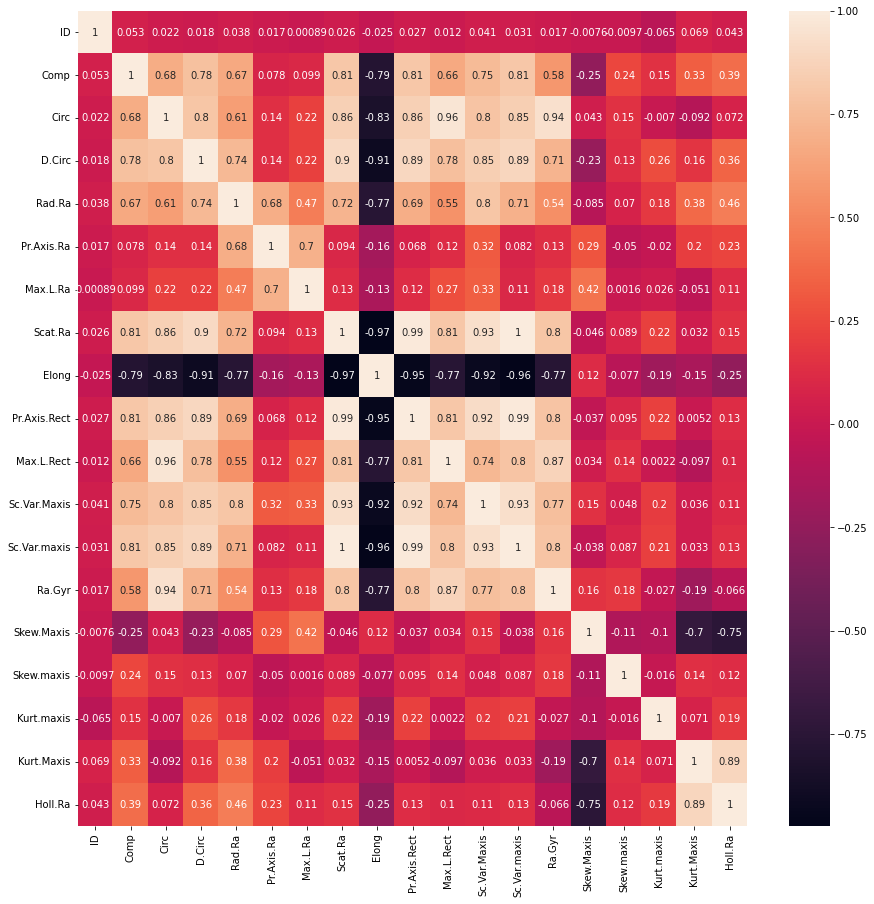

In [345]:
plt.figure(figsize= (15,15))
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

In [346]:
cols = set()
for i in range(len(correlation.columns)):
  for j in range(i):
    if correlation.iloc[i,j] > 0.9:
      col_name = correlation.columns[i]
      cols.add(col_name)

In [347]:
cols      # we have collected all features which are correlated with correlation more than 90%

{'Max.L.Rect',
 'Pr.Axis.Rect',
 'Ra.Gyr',
 'Sc.Var.Maxis',
 'Sc.Var.maxis',
 'Scat.Ra'}

In [348]:
X_train.nunique()

ID              575
Comp             41
Circ             27
D.Circ           58
Rad.Ra          129
Pr.Axis.Ra       37
Max.L.Ra         20
Scat.Ra         120
Elong            34
Pr.Axis.Rect     13
Max.L.Rect       64
Sc.Var.Maxis    117
Sc.Var.maxis    328
Ra.Gyr          130
Skew.Maxis       38
Skew.maxis       23
Kurt.maxis       38
Kurt.Maxis       29
Holl.Ra          31
dtype: int64

As cols set are correlated so we will drop this features & also we drop id feature because id has more unique values.

In [349]:
X_train.drop(cols, axis = 1, inplace = True)
X_train.drop('ID', axis = 1, inplace = True)

In [350]:
X_test.drop(cols, axis = 1, inplace = True)
X_test.drop('ID', axis = 1, inplace = True)

# Handling Outliers using Z score

In [351]:
X_train.describe()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Elong,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,93.469565,44.928696,81.996522,169.010435,62.043478,8.754783,40.940870,72.840000,6.504348,12.354783,188.686957,195.285217
std,8.177178,6.134962,15.290907,33.957083,8.744925,5.336160,7.588271,7.718172,4.855712,8.654783,5.965296,7.147674
min,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,26.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,33.000000,68.000000,3.000000,5.500000,184.000000,190.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,43.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,100.000000,49.000000,96.000000,194.000000,65.000000,10.000000,46.000000,76.000000,9.000000,18.000000,193.000000,200.500000
max,117.000000,59.000000,110.000000,333.000000,138.000000,55.000000,61.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [352]:
X_train.shape

(575, 12)

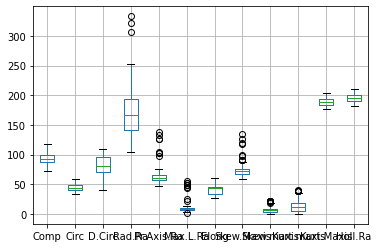

In [353]:
X_train.boxplot()

In [354]:
from scipy import stats
import numpy as np

In [355]:
cols_with_outliers = ['Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis']
#  these features are having outliers

In [356]:
X_train.reset_index(drop = True, inplace = True)

In [357]:
y_train.reset_index(drop = True, inplace = True)

In [358]:
X_train.shape

(575, 12)

In [359]:
y_train.shape

(575,)

In [360]:
z_score = stats.zscore(X_train['Rad.Ra'])
index_z = np.where(abs(z_score) > 3)
X_train.drop(index_z[0], inplace = True)
y_train.drop(index_z[0], inplace = True)
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

In [361]:
z_score = stats.zscore(X_train['Pr.Axis.Ra'])
index_z = np.where(abs(z_score) > 3)
X_train.drop(index_z[0], inplace = True)
y_train.drop(index_z[0], inplace = True)
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

In [362]:
z_score = stats.zscore(X_train['Max.L.Ra'])
index_z = np.where(abs(z_score) > 3)
X_train.drop(index_z[0], inplace = True)
y_train.drop(index_z[0], inplace = True)
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

In [363]:
z_score = stats.zscore(X_train['Skew.Maxis'])
index_z = np.where(abs(z_score) > 3)
X_train.drop(index_z[0], inplace = True)
y_train.drop(index_z[0], inplace = True)
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

In [364]:
z_score = stats.zscore(X_train['Skew.maxis'])
index_z = np.where(abs(z_score) > 3)
X_train.drop(index_z[0], inplace = True)
y_train.drop(index_z[0], inplace = True)
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

In [365]:
z_score = stats.zscore(X_train['Kurt.maxis'])
index_z = np.where(abs(z_score) > 3)
X_train.drop(index_z[0], inplace = True)
y_train.drop(index_z[0], inplace = True)
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

In [366]:
X_train.shape   # after removing outliers the row size is reduced from 575 to 562

(562, 12)

In [367]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Comp        562 non-null    int64
 1   Circ        562 non-null    int64
 2   D.Circ      562 non-null    int64
 3   Rad.Ra      562 non-null    int64
 4   Pr.Axis.Ra  562 non-null    int64
 5   Max.L.Ra    562 non-null    int64
 6   Elong       562 non-null    int64
 7   Skew.Maxis  562 non-null    int64
 8   Skew.maxis  562 non-null    int64
 9   Kurt.maxis  562 non-null    int64
 10  Kurt.Maxis  562 non-null    int64
 11  Holl.Ra     562 non-null    int64
dtypes: int64(12)
memory usage: 52.8 KB


In [368]:
y_train.describe()

count    562.000000
mean       1.443060
std        1.109574
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Class, dtype: float64

In [369]:
y_train.shape

(562,)

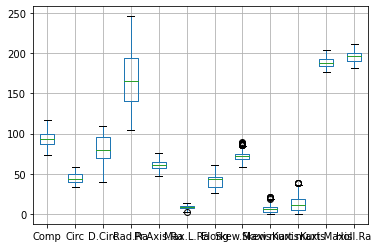

In [370]:
X_train.boxplot()

# Feature Scaling using Standardization

In [371]:
from sklearn.preprocessing import StandardScaler

In [372]:
SS = StandardScaler()

In [373]:
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

# Building Model

In [374]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [375]:
lr = LogisticRegression()
sgd = SGDClassifier()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [376]:
lr.fit(X_train, y_train)
sgd.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

# Accuracy

In [377]:
print(lr.score(X_train, y_train))
print(sgd.score(X_train, y_train))
print(knn.score(X_train, y_train))
print(svc.score(X_train, y_train))
print(dtc.score(X_train, y_train))
print(rfc.score(X_train, y_train))
print(gbc.score(X_train, y_train))

0.802491103202847
0.7366548042704626
0.8078291814946619
0.8434163701067615
1.0
1.0
0.9893238434163701


In [378]:
print(lr.score(X_test, y_test))
print(sgd.score(X_test, y_test))
print(knn.score(X_test, y_test))
print(svc.score(X_test, y_test))
print(dtc.score(X_test, y_test))
print(rfc.score(X_test, y_test))
print(gbc.score(X_test, y_test))

0.7777777777777778
0.6736111111111112
0.7013888888888888
0.7569444444444444
0.6875
0.75
0.7291666666666666


In [ ]:
#  In train score Decision Tree, Random Forest & Gredient Boosting have maximum score
#  but in test score Logistic Regression have maximunm score
# let's see for F1 score for further clarification

# F1 Score

In [379]:
from sklearn.metrics import f1_score

y_pred1 = lr.predict(X_test)
y_pred2 = sgd.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = svc.predict(X_test)
y_pred5 = dtc.predict(X_test)
y_pred6 = rfc.predict(X_test)
y_pred7 = gbc.predict(X_test)

In [380]:
print(f1_score(y_test, y_pred1, average = 'macro'))
print(f1_score(y_test, y_pred2, average = 'macro'))
print(f1_score(y_test, y_pred3, average = 'macro'))
print(f1_score(y_test, y_pred4, average = 'macro'))
print(f1_score(y_test, y_pred5, average = 'macro'))
print(f1_score(y_test, y_pred6, average = 'macro'))
print(f1_score(y_test, y_pred7, average = 'macro'))

0.7527223828750182
0.6594813085285331
0.6815351315351316
0.7396902928862559
0.6789352190760641
0.7293686956930093
0.7139884676064536


In [ ]:
# As per F1 score also Logistic Regression has maximum score 
# Let's Tune Logistic Regression
# before that we can see confusion matrix

# Confusion Matrix

In [381]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


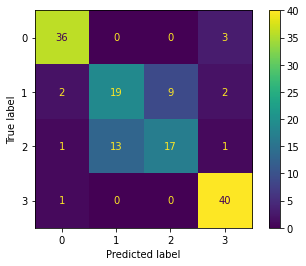

In [388]:
plot_confusion_matrix(lr, X_test, y_test)

In [ ]:
# Here in confusion matrix the predicted & true values for 0 & 3 are very much accurate
# and for 1 is also good 
# but for 2 I it is little bit poor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


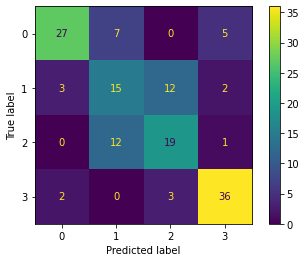

In [389]:
plot_confusion_matrix(sgd, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


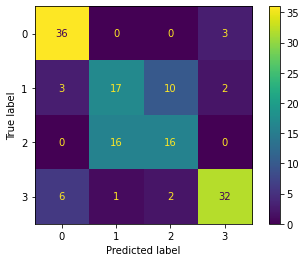

In [392]:
plot_confusion_matrix(knn, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


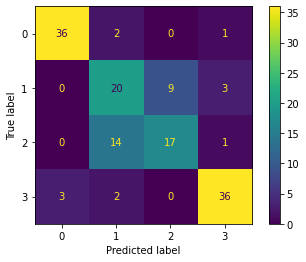

In [393]:
plot_confusion_matrix(svc, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


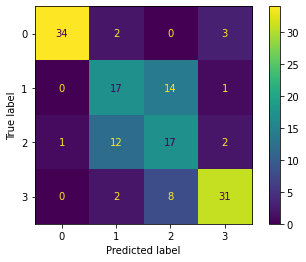

In [394]:
plot_confusion_matrix(dtc, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


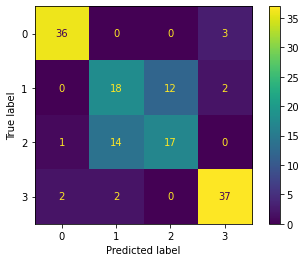

In [395]:
plot_confusion_matrix(rfc, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


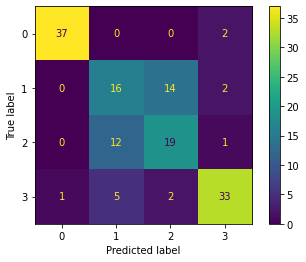

In [396]:
plot_confusion_matrix(gbc, X_test, y_test)

# Hyper Parameter Tuning

In [382]:
from sklearn.model_selection import GridSearchCV

In [383]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg',  'lbfgs', 'liblinear', 'sag', 'saga']}

In [384]:
gscv = GridSearchCV(LogisticRegression(), param_grid = param_grid)

In [385]:
gscv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [386]:
gscv.best_params_

{'C': 10, 'solver': 'saga'}

In [387]:
gscv.best_score_

0.7793141592920355

# Final Model

In [397]:
final_model = LogisticRegression(C = 10, solver = 'saga')

In [399]:
final_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=10, solver='saga')

Accuracy

In [402]:
final_model.score(X_test, y_test)

0.7777777777777778

F1 Score

In [403]:
y_pred = lr.predict(X_test)
print(f1_score(y_test, y_pred, average = 'macro'))

0.7527223828750182


Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


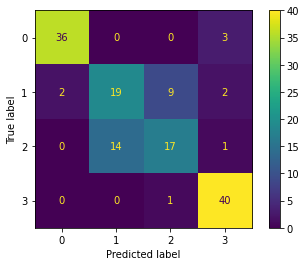

In [404]:
plot_confusion_matrix(final_model, X_test, y_test)

In [ ]:
# This is the final model of Logistic Regression 
# with Accuracy score 0.77 & F1 score 0.75